# Day 2 PM: Preparing data for analysis with `tidyr`

Visualization, modeling and inference in R is simplest when the data is collected into a single "tidy" `data.frame`. What constitutes a tidy `data.frame` depends somewhat on the context, but at a minimum it requires that each can be interpreted as an **observation**, each column as a **variable**,  and each cell contains a **value**.

The original data set may vary from this ideal tidy format in several ways, and the `tidyr` package provides tools for us to convert data from messy to tidy. In particular, we show several common issues that we need to address to make data tidy. Here, we focus on three main verbs for tidying data - `gather`, `spread` and `separate`. We also briefly discuss what to do when the data is originally distributed over several files.

In [1]:
suppressPackageStartupMessages(library(tidyverse))

Warning message:
“Installed Rcpp (0.12.12) different from Rcpp used to build dplyr (0.12.11).
Please reinstall dplyr to avoid random crashes or undefined behavior.”Warning message:
“package ‘dplyr’ was built under R version 3.4.1”

## Prelude: Piping

We will operate on data incrementally, step by step. At each step, we take a `data.frame`, apply a function to it, and generate a different `data.frame`. This `data.frame` itself can be modified by another function, leading to a chain of operations that all take a `data.frame` as input and return a `data.frame` as output. A convenient idiom (borrowed from the Unix shell) is to connect adjacent functions in the chain by a **pipe** which takes the output of a function and feeds it as input to the next function. The **pipe** operator in R is denoted by `%>%`.

### A simple piping example

Here we use piping to show rows 6-10.

In [2]:
head(iris, n=10)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


In [3]:
iris %>% head(n=10) %>% tail(n=5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


## Splitting columns with `separate`

One common issue is that the values in a single column are actually a combination of many variables. For example, there may be a "description" field that combines site ID,, patient ID and date. Tidy data requires that each column represents a single variable, and we need to `separate` the variables.

### Make up a data set for illustration

In [4]:
sites <- paste("site", 1:10, sep="")
sites

[1] "site1"  "site2"  "site3"  "site4"  "site5"  "site6"  "site7"  "site8" 
 [9] "site9"  "site10"

In [5]:
subjects <- sample.int(100, 10)
subjects

[1] 64  7 96 28 89 69 29 65 51 18

In [6]:
dates <- sample(seq(as.Date('2016/01/01'), 
                    as.Date('2017/01/01'), by="day"), 10)
dates

[1] "2016-05-25" "2016-07-23" "2016-08-04" "2016-07-04" "2016-12-06"
 [6] "2016-10-29" "2016-08-13" "2016-09-17" "2016-11-16" "2016-04-23"

In [7]:
df <- data.frame(description=paste(sites, subjects, dates, sep=":"),
                 score=rnorm(10))

In [8]:
head(df)

description,score
site1:64:2016-05-25,-1.3108151
site2:7:2016-07-23,1.6269679
site3:96:2016-08-04,0.5706658
site4:28:2016-07-04,-1.7594424
site5:89:2016-12-06,0.9366193
site6:69:2016-10-29,0.5264268


### Using `separate`

In [9]:
df %>% separate(col=description, into=c("site", "pid", "date"), sep=":") %>% head

site,pid,date,score
site1,64,2016-05-25,-1.3108151
site2,7,2016-07-23,1.6269679
site3,96,2016-08-04,0.5706658
site4,28,2016-07-04,-1.7594424
site5,89,2016-12-06,0.9366193
site6,69,2016-10-29,0.5264268


### When a single separator is not enough

In [10]:
df.1 <- data.frame(description=paste(sites, subjects, dates, sep="-"),
                   score=rnorm(10))

In [11]:
head(df.1)

description,score
site1-64-2016-05-25,0.9018461
site2-7-2016-07-23,1.8470596
site3-96-2016-08-04,0.1700874
site4-28-2016-07-04,-0.7663310
site5-89-2016-12-06,-1.0308395
site6-69-2016-10-29,1.2056017


### Using `extract` (advanced)

The verb `extract` is like separate, but instead of using a separator, it uses a **regular expression** to split strings. A crash course in regular expressions:

- `abc` matches the characters 'abc'
- `-` matches the character '-'
- `[abc]` matches `a` or `b` or `c`
- `[a-z]` matches any lower case letter
- `[0-9]` matches any digit
- `.` matches any single character
- `\\d` matches any single digit
- `+` matches one or more of the preceding character set
- `*` matches zero or more of the preceding character set
- `{m, n}` matches between m and n copies of the preceding character set
- `()` indicates a capture group - the separated values desired

In [12]:
df.1 %>% extract(col=description,  into=c("site", "pid", "date"), regex="site([0-9]+)-([0-9]+)-(.*)") %>% head

site,pid,date,score
1,64,2016-05-25,0.9018461
2,7,2016-07-23,1.8470596
3,96,2016-08-04,0.1700874
4,28,2016-07-04,-0.7663310
5,89,2016-12-06,-1.0308395
6,69,2016-10-29,1.2056017


### Separate rows

Less commonly, a single row contains multiple observations needs to be separated into multiple rows using `separate_rows` or `extract_rows`.

In [13]:
df.2 <- data.frame(pid=1:10, scores=replicate(10, paste(sample(1:10000, 3), collapse=",")))

In [14]:
head(df.2)

pid,scores
1,"5631,9112,2114"
2,"720,6652,4332"
3,"9810,243,853"
4,"8522,7479,9176"
5,"8715,7581,3025"
6,"4658,6293,9580"


In [15]:
df.2 %>% separate_rows(col=scores, sep=",") %>% head

pid,scores
1,5631
1,9112
1,2114
2,720
2,6652
2,4332


## From columns to key-value pairs with `gather`

Sometimes a single variable is spread out over multiple columns. For example, we may wish to consider the `Sepal.Length`, `Sepal.Width`, `Petal.Length` and `Petal.Width` as variants of a single variable `measure`. The verb to use is `gather` which transforms a "wide" `data.frame` into a "tall" one.

For example, suppose we want `ggplot2` to plot each measurement in a separate panel, colored by `Species`. 

In [16]:
head(iris, n=3)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa


In [17]:
iris %>% gather(key=measure, value = value, 1:4) %>% head(n=3)

Species,measure,value
setosa,Sepal.Length,5.1
setosa,Sepal.Length,4.9
setosa,Sepal.Length,4.7


### Alternative ways of specifying columns to gather

In [18]:
iris %>% gather(measure, value, 1:4) %>% head(n=3)

Species,measure,value
setosa,Sepal.Length,5.1
setosa,Sepal.Length,4.9
setosa,Sepal.Length,4.7


In [19]:
iris %>% gather(measure, value, c(Sepal.Length, Sepal.Width, Petal.Length, Petal.Width)) %>% head(n=3)

Species,measure,value
setosa,Sepal.Length,5.1
setosa,Sepal.Length,4.9
setosa,Sepal.Length,4.7


In [20]:
iris %>% gather(measure, value, Sepal.Length, Sepal.Width, Petal.Length, Petal.Width) %>% head(n=3)

Species,measure,value
setosa,Sepal.Length,5.1
setosa,Sepal.Length,4.9
setosa,Sepal.Length,4.7


In [21]:
iris %>% gather(measure, value, -Species) %>% head(n=3)

Species,measure,value
setosa,Sepal.Length,5.1
setosa,Sepal.Length,4.9
setosa,Sepal.Length,4.7


In [22]:
iris %>% gather(measure, value, -5) %>% head(n=3)

Species,measure,value
setosa,Sepal.Length,5.1
setosa,Sepal.Length,4.9
setosa,Sepal.Length,4.7


### Use of `gather` for plotting

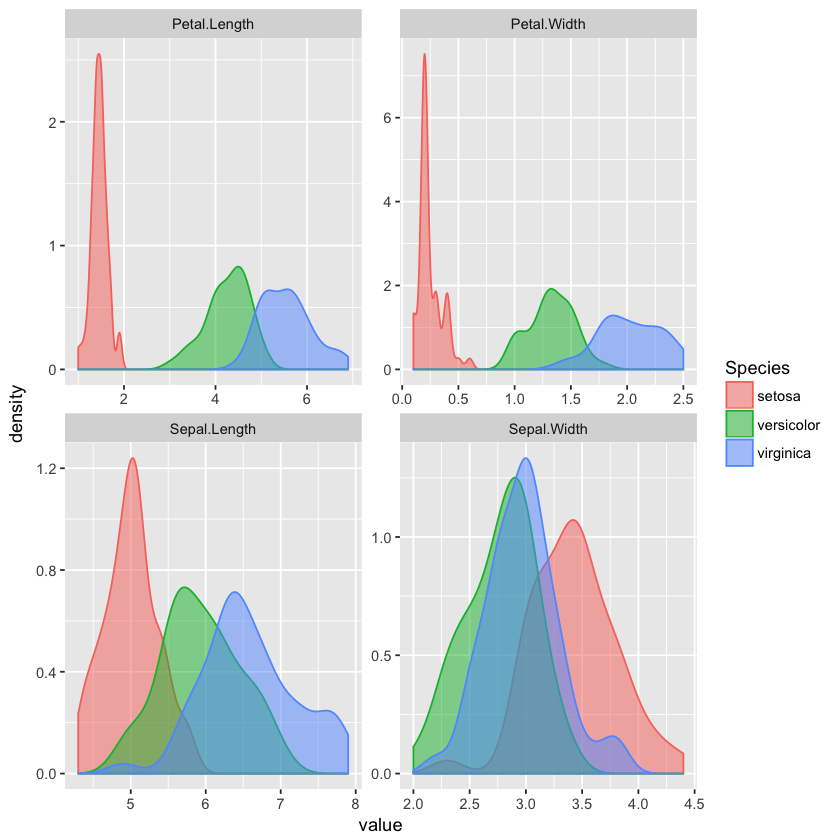

In [23]:
df.3 <- iris %>% gather(measure, value, -Species)
ggplot(df.3, aes(x=value, color=Species, fill=Species)) +
geom_density(alpha=0.5) +
facet_wrap(~ measure, scales = "free")

## From key-value pairs to columns with `spread`

The verb `spread` is the reverse of `gather` - it makes a "tall" `data.frame` into a "wide" one. However, it requires that each row have a unique identifier to do so. If we just try to apply `spread` to the tall version of `iris`, it will fail because there are 50 of each Species. We therefore need to generate a new column to make each row have a unique identifier.

In [24]:
head(df.3)

Species,measure,value
setosa,Sepal.Length,5.1
setosa,Sepal.Length,4.9
setosa,Sepal.Length,4.7
setosa,Sepal.Length,4.6
setosa,Sepal.Length,5.0
setosa,Sepal.Length,5.4


In [25]:
df.3$n <- rep(1:50, 12)

In [26]:
iris.1 <- df.3 %>% spread(measure, value)
head(iris.1)

Species,n,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
setosa,1,1.4,0.2,5.1,3.5
setosa,2,1.4,0.2,4.9,3.0
setosa,3,1.3,0.2,4.7,3.2
setosa,4,1.5,0.2,4.6,3.1
setosa,5,1.4,0.2,5.0,3.6
setosa,6,1.7,0.4,5.4,3.9


#### We can drop the column n now

In [27]:
iris.2 <- iris.1[, -2]
head(iris.2)

Species,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
setosa,1.4,0.2,5.1,3.5
setosa,1.4,0.2,4.9,3.0
setosa,1.3,0.2,4.7,3.2
setosa,1.5,0.2,4.6,3.1
setosa,1.4,0.2,5.0,3.6
setosa,1.7,0.4,5.4,3.9


#### How to do all this in a single fluent command using pipes (explained in next session)

In [28]:
df.3 <- df.3[,-4] # remove n to restore oroignal tall format

In [29]:
df.3 %>% 
mutate(n=rep(1:50,12)) %>% 
spread(measure, value) %>% 
select(-n) %>% 
head

Species,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
setosa,1.4,0.2,5.1,3.5
setosa,1.4,0.2,4.9,3.0
setosa,1.3,0.2,4.7,3.2
setosa,1.5,0.2,4.6,3.1
setosa,1.4,0.2,5.0,3.6
setosa,1.7,0.4,5.4,3.9


## Working with missing data

Sometimes cells contain missing values. Here we show the simplest way to deal with this common scenario.  The approach shown is not always appropriate - consult a statistician if in doubt.

In [30]:
iris.missing <- iris
iris.missing[2,3] <- NA
iris.missing[4:6, 1] <- NA

In [31]:
head(iris.missing)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,NA,0.2,setosa
4.7,3.2,1.3,0.2,setosa
NA,3.1,1.5,0.2,setosa
NA,3.6,1.4,0.2,setosa
NA,3.9,1.7,0.4,setosa


### Drop any row with missing data

This is known as complete case analysis, and is appropriate when you have abundant observations and the missing values are believed to be missing at random.

In [32]:
iris.missing %>% drop_na %>% head

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


## Combining data with `join` (part of `dplyr`)

Sometimes data is distributed over many files. In the simplest case, each data set has exactly the same format as the others, and we just need to append additional rows. At other times, each data set contains some different variable (e.g. merging clinical and assay data) and we need to match rows according to some unique row identifier.

### When each data.frame is similar

In [33]:
levels(iris$Species)

[1] "setosa"     "versicolor" "virginica"

In [34]:
setosa <- iris %>% filter(Species=="setosa")
versicolor <- iris %>% filter(Species=="versicolor")
virginica <- iris %>% filter(Species=="virginica")

In [35]:
dim(setosa)

[1] 50  5

In [36]:
head(setosa, 3)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa


In [37]:
dim(versicolor)

[1] 50  5

In [38]:
head(versicolor, 3)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
7.0,3.2,4.7,1.4,versicolor
6.4,3.2,4.5,1.5,versicolor
6.9,3.1,4.9,1.5,versicolor


In [39]:
dim(virginica)

[1] 50  5

In [40]:
head(virginica, 3)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
6.3,3.3,6.0,2.5,virginica
5.8,2.7,5.1,1.9,virginica
7.1,3.0,5.9,2.1,virginica


In [41]:
iris.combined <- bind_rows(setosa, versicolor, virginica)

In [42]:
dim(iris.combined)

[1] 150   5

In [43]:
iris.combined %>% sample_n(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
43,4.4,3.2,1.3,0.2,setosa
129,6.4,2.8,5.6,2.1,virginica
26,5.0,3.0,1.6,0.2,setosa
15,5.8,4.0,1.2,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
7,4.6,3.4,1.4,0.3,setosa
145,6.7,3.3,5.7,2.5,virginica
131,7.4,2.8,6.1,1.9,virginica
85,5.4,3.0,4.5,1.5,versicolor
28,5.2,3.5,1.5,0.2,setosa


### When data frames are different

In [44]:
df.clin <- data.frame(site.id=c('A', 'A', 'A', 'B', 'B', 'B'), 
                      pt.id=c(100, 101, 102, 100, 102, 105), 
                      age=c(38, 35, 43, 50, 62, 50))
df.clin

site.id,pt.id,age
A,100,38
A,101,35
A,102,43
B,100,50
B,102,62
B,105,50


In [45]:
df.lab <- data.frame(site.id=c('B', 'B', 'B', 'A', 'A', 'A'),
                     pt.id=c(103, 100, 105, 100, 101, 102),
                     values=sample(100:1000, 6))
df.lab

site.id,pt.id,values
B,103,872
B,100,623
B,105,307
A,100,325
A,101,651
A,102,255


#### Keep only elements in common

In [46]:
df.clin %>% inner_join(df.lab, by = c("site.id", "pt.id"))

site.id,pt.id,age,values
A,100,38,325
A,101,35,651
A,102,43,255
B,100,50,623
B,105,50,307


#### Keep all rows in df.clin

In [47]:
df.clin %>% left_join(df.lab, by = c("site.id", "pt.id"))

site.id,pt.id,age,values
A,100,38,325
A,101,35,651
A,102,43,255
B,100,50,623
B,102,62,NA
B,105,50,307


#### Keep all rows in df.lab

In [48]:
df.clin %>% right_join(df.lab, by = c("site.id", "pt.id"))

site.id,pt.id,age,values
B,103,NA,872
B,100,50,623
B,105,50,307
A,100,38,325
A,101,35,651
A,102,43,255


#### Keep all rows in df.clin or df.lab

In [49]:
df.clin %>% full_join(df.lab, by = c("site.id", "pt.id"))

site.id,pt.id,age,values
A,100,38,325
A,101,35,651
A,102,43,255
B,100,50,623
B,102,62,NA
B,105,50,307
B,103,NA,872


### When identifier columns have different names

In [50]:
df.lab.1 <- data.frame(site=c('B', 'B', 'B', 'A', 'A', 'A'),
                     pid=c(103, 100, 105, 100, 101, 102),
                     values=sample(100:1000, 6))
df.lab.1

site,pid,values
B,103,625
B,100,517
B,105,736
A,100,739
A,101,165
A,102,944


#### Keep only elements in common

In [51]:
df.clin %>% inner_join(df.lab.1, by = c("site.id"="site", "pt.id"="pid"))

site.id,pt.id,age,values
A,100,38,739
A,101,35,165
A,102,43,944
B,100,50,517
B,105,50,736


### When identifiers are in the row.names (advanced)

In [52]:
df.lab.2 <- data.frame(values=sample(100:1000, 6))
rownames(df.lab.2) <- paste(c('B', 'B', 'B', 'A', 'A', 'A'),
                           c(103, 100, 105, 100, 101, 102), sep="-")
df.lab.2

,values
B-103,963
B-100,556
B-105,620
A-100,335
A-101,886
A-102,115


In [53]:
df.lab.2 %>% 
    rownames_to_column %>%
  separate(rowname, into=c("site.id", "pt.id"), sep="-")

site.id,pt.id,values
B,103,963
B,100,556
B,105,620
A,100,335
A,101,886
A,102,115


In [54]:
df.clin %>% inner_join(
    # create new data.frame with matching identifier columns
    df.lab.2 %>% 
    rownames_to_column %>% 
    separate(rowname, into=c("site.id", "pt.id"), sep="-") %>%
    mutate(site.id=as.factor(site.id), pt.id=as.numeric(pt.id)),
    # specify columns to join on
    by=c("site.id", "pt.id")    
)

site.id,pt.id,age,values
A,100,38,335
A,101,35,886
A,102,43,115
B,100,50,556
B,105,50,620
